In [8]:
import pandas as pd
import numpy as np

df = pd.read_csv('workout_data.csv')
# add date column from start_time
df['date'] = pd.to_datetime(df['start_time'], format='%d %b %Y, %H:%M')
# add week column from date
df['week'] = df['date'] - pd.to_timedelta(df['date'].dt.weekday, unit='d')

df['date'] = df['date'].dt.strftime('%Y-%m-%d')
df['week'] = df['week'].dt.strftime('%Y-%m-%d')

print(df[['date', 'week']])

           date        week
0    2025-05-23  2025-05-19
1    2025-05-23  2025-05-19
2    2025-05-23  2025-05-19
3    2025-05-23  2025-05-19
4    2025-05-23  2025-05-19
..          ...         ...
295  2025-04-06  2025-03-31
296  2025-04-06  2025-03-31
297  2025-04-06  2025-03-31
298  2025-04-06  2025-03-31
299  2025-04-06  2025-03-31

[300 rows x 2 columns]


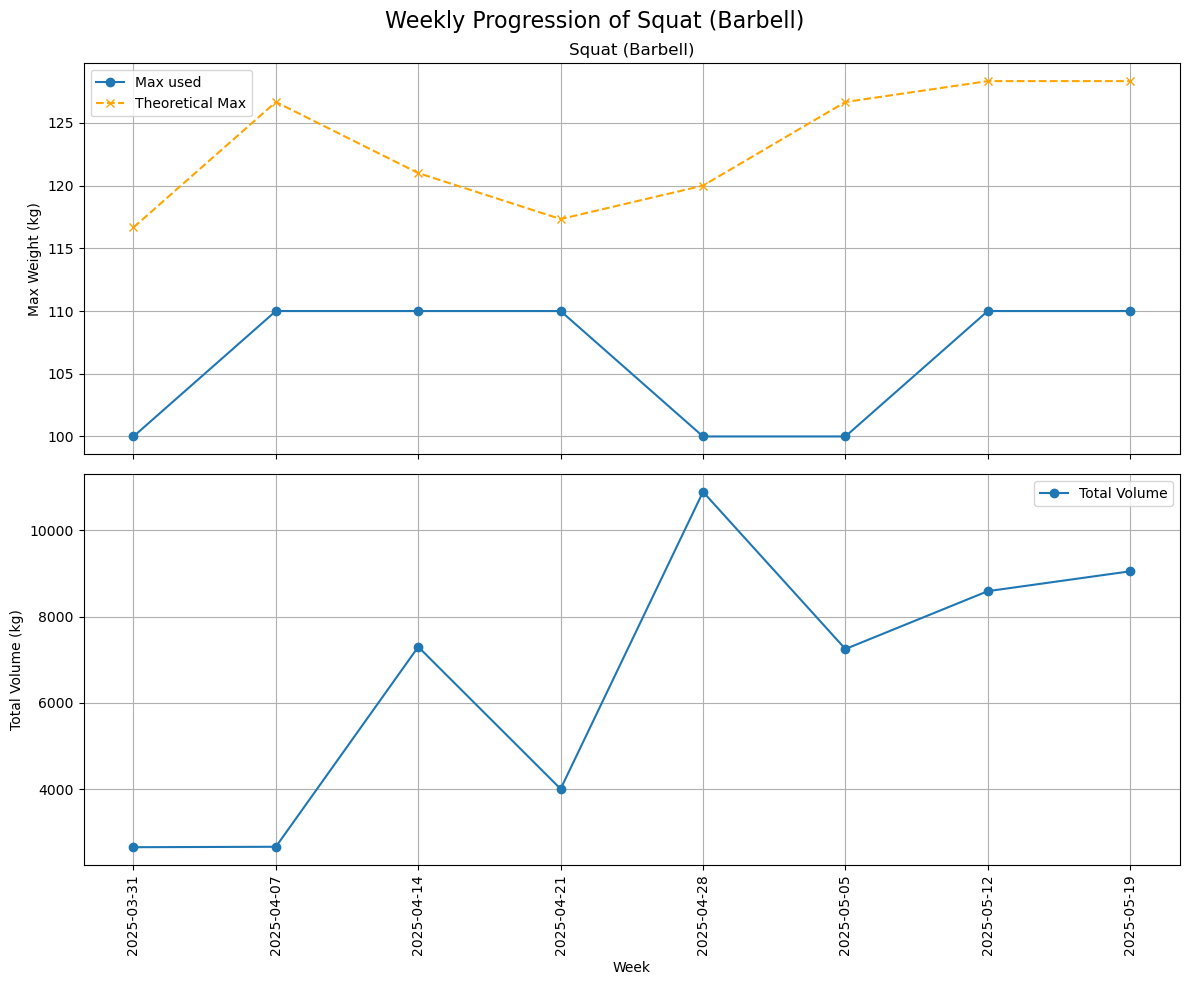

In [11]:
import matplotlib.pyplot as plt

def plot_exercise_progression(exercise_title):
    filtered = df[df['exercise_title'] == exercise_title].copy()
    filtered['theoretical_max'] = filtered['weight_kg'] * (1 + filtered['reps'] / 30)
    filtered['volume'] = filtered['weight_kg'] * filtered['reps']

    max_weight_per_week = filtered.groupby('week')['weight_kg'].max().reset_index()
    max_theoretical_per_week = filtered.groupby('week')['theoretical_max'].max().reset_index()
    total_volume_per_week = filtered.groupby('week')['volume'].sum().reset_index()
    
    # Convert week to string for even spacing
    max_weight_per_week['week_str'] = max_weight_per_week['week'].astype(str)
    max_theoretical_per_week['week_str'] = max_theoretical_per_week['week'].astype(str)
    total_volume_per_week['week_str'] = total_volume_per_week['week'].astype(str)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

    # First plot: Max used and Theoretical Max
    ax1.plot(max_weight_per_week['week_str'], max_weight_per_week['weight_kg'], marker='o', label='Max used')
    ax1.plot(max_theoretical_per_week['week_str'], max_theoretical_per_week['theoretical_max'], marker='x', linestyle='--', color='orange', label='Theoretical Max')
    ax1.set_title(exercise_title)
    ax1.set_ylabel('Max Weight (kg)')
    ax1.legend()
    ax1.grid()

    # Second plot: Total Volume
    ax2.plot(total_volume_per_week['week_str'], total_volume_per_week['volume'], marker='o', label='Total Volume')
    ax2.set_xlabel('Week')
    ax2.set_ylabel('Total Volume (kg)')
    ax2.legend()
    ax2.grid()

    fig.suptitle(f'Weekly Progression of {exercise_title}', fontsize=16)
    plt.xticks(ticks=range(len(max_weight_per_week['week_str'])), labels=max_weight_per_week['week_str'], rotation=90)
    plt.tight_layout()
    plt.show()


# Example usage
plot_exercise_progression('Squat (Barbell)')

In [3]:
squats = df[df['exercise_title'] == 'Squat (Barbell)']
display(squats[['date', 'reps', 'weight_kg']])

,date,reps,weight_kg
0,2025-05-23 14:41:00,10.0,20.0
1,2025-05-23 14:41:00,10.0,60.0
2,2025-05-23 14:41:00,5.0,80.0
3,2025-05-23 14:41:00,3.0,90.0
4,2025-05-23 14:41:00,3.0,100.0
...,...,...,...
287,2025-04-06 10:31:00,8.0,60.0
288,2025-04-06 10:31:00,8.0,80.0
289,2025-04-06 10:31:00,6.0,90.0
290,2025-04-06 10:31:00,5.0,100.0
